In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt


In [81]:


# Đọc dữ liệu từ file CSV
data = pd.read_csv('data/encoded_data.csv')

# Chia dữ liệu thành features (X) và target (y)
X = data.drop('Giá(đ)', axis=1)  
y = data['Giá(đ)']


# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Khởi tạo mô hình Logistic Regression
model = LogisticRegression(multi_class='multinomial', max_iter=200, solver='lbfgs', C=1)

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Đánh giá hiệu suất của mô hình trên tập kiểm tra và tập huấn luyện
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

# Lưu kết quả độ chính xác của tập huấn luyện và tập kiểm tra


 
# In ra giá trị trung bình của độ chính xác
print("Độ chính xác trung bình trên tập huấn luyện sau 50 lần lặp lại:", train_accuracy)
print("Độ chính xác trung bình trên tập kiểm tra sau 50 lần lặp lại:", test_accuracy)



Độ chính xác trung bình trên tập huấn luyện sau 50 lần lặp lại: 0.7864214992927864
Độ chính xác trung bình trên tập kiểm tra sau 50 lần lặp lại: 0.7231638418079096


In [157]:


# Đọc dữ liệu từ file CSV
data = pd.read_csv('data/encoded_data.csv')

# Chia dữ liệu thành features (X) và target (y)
X = data.drop('Giá(đ)', axis=1)  # Thay 'target_column' bằng tên cột chứa nhãn cần phân loại
y = data['Giá(đ)']

# Khởi tạo mảng để lưu trữ các kết quả accuracy
train_accuracies = []
test_accuracies = []

# Lặp lại quá trình 50 lần
for _ in range(50):
    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% - 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Khởi tạo mô hình Logistic Regression
    model = SVC()
    
    # Huấn luyện mô hình trên tập huấn luyện
    model.fit(X_train, y_train)
    
    # Dự đoán nhãn trên tập kiểm tra
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    # Đánh giá hiệu suất của mô hình trên tập kiểm tra và tập huấn luyện
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Lưu kết quả độ chính xác của tập huấn luyện và tập kiểm tra
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Tính giá trị trung bình của độ chính xác trên tập huấn luyện và tập kiểm tra
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

# In ra giá trị trung bình của độ chính xác
print("Độ chính xác trung bình trên tập huấn luyện sau 50 lần lặp lại:", avg_train_accuracy)
print("Độ chính xác trung bình trên tập kiểm tra sau 50 lần lặp lại:", avg_test_accuracy)


Độ chính xác trung bình trên tập huấn luyện sau 50 lần lặp lại: 0.8524469589816124
Độ chính xác trung bình trên tập kiểm tra sau 50 lần lặp lại: 0.7239548022598871


Accuracy on test: 0.66


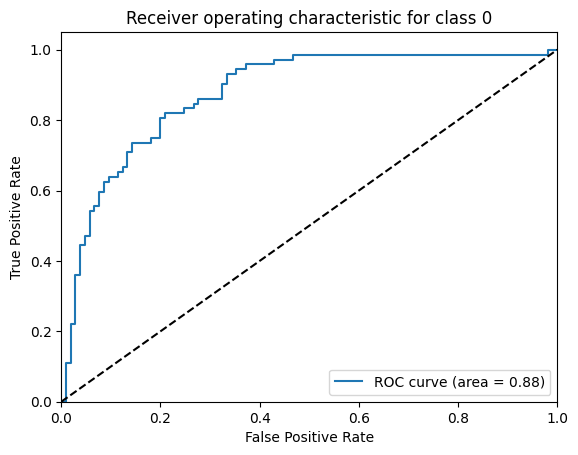

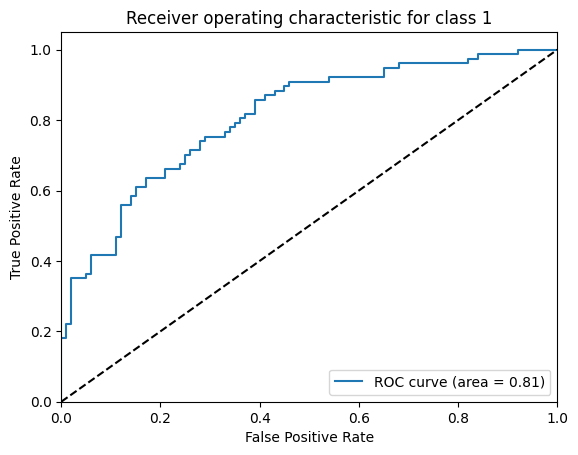

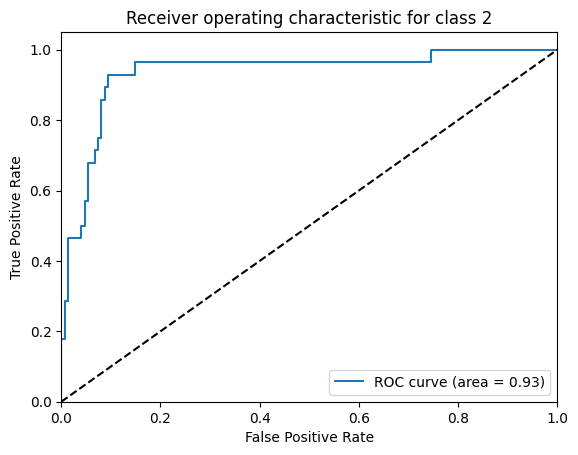

In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize

# Đọc dữ liệu
data = pd.read_csv('data/encoded_data.csv')

# Chia dữ liệu thành features (X) và target (y)
X = data.drop('Giá(đ)', axis=1)
y = data['Giá(đ)']
y = label_binarize(y, classes=[1, 2, 3])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# classifier
clf = OneVsRestClassifier(LogisticRegression(multi_class='multinomial',max_iter= 200,solver='lbfgs'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score = clf.fit(X_train, y_train).decision_function(X_test)  # trainning trên tập dataset
print(f"Accuracy on test: {accuracy_score(list(y_test), list(y_pred)):.2f}")
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
for i in range(n_classes ):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for each class
for i in range(n_classes ):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for class {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()



In [43]:

print(f"Accuracy on train: {accuracy_score(list(y_test), list(y_pred)):.2f}")

Accuracy on train: 0.66
